# LSTM  Network #

In this notebook we will build LSTM Recurrent NN to classify Sentiments using Keras

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


**Set Hyperparameter**

In [0]:
output_dir = 'data/lstm'

#Training 
epochs = 4
batch_size = 128

#vector-space embedding
n_dim = 64
n_unique_words = 5000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.25

#lstm architecture 
n_lstm = 256
drop_lstm = 0.2


**Load Data**

In [3]:
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words)

17465344/17464789 [==============================] - 3s 0us/step


In [4]:
X_train.shape,y_train.shape

((25000,), (25000,))

In [5]:
X_valid.shape,y_valid.shape

((25000,), (25000,))

**Preprocess Data**

In [0]:
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

**Design Neural Network**

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 648,961
Trainable params: 648,961
Non-trainable params: 0
_________________________________________________________________


**Configure Model**

In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

In [0]:
# Check if the output dir is present or not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

**Train :) **

In [12]:
X_valid.shape,y_valid.shape

((25000, 100), (25000,))

In [13]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 68s 3ms/step - loss: 0.5146 - acc: 0.7312 - val_loss: 0.3517 - val_acc: 0.8460
Epoch 2/4
25000/25000 [==============================] - 66s 3ms/step - loss: 0.3306 - acc: 0.8590 - val_loss: 0.3444 - val_acc: 0.8507
Epoch 3/4
 4992/25000 [====>.........................] - ETA: 42s - loss: 0.2678 - acc: 0.8934

25000/25000 [==============================] - 67s 3ms/step - loss: 0.2816 - acc: 0.8858 - val_loss: 0.3447 - val_acc: 0.8487
Epoch 4/4
25000/25000 [==============================] - 66s 3ms/step - loss: 0.2535 - acc: 0.8992 - val_loss: 0.3493 - val_acc: 0.8480


In [0]:
model.load_weights(output_dir+"/weights.02.hdf5")

In [0]:
y_hat = model.predict_proba(X_valid)

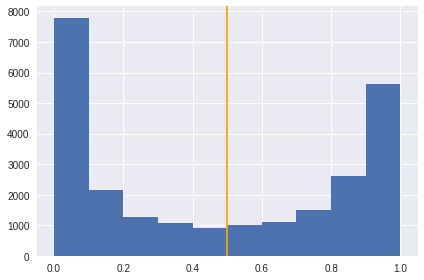

In [17]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')
plt.tight_layout()

**Evaluate the model**

In [0]:
auc = roc_auc_score(y_valid,y_hat)*100

In [19]:
"{:0.2f}".format(auc)

'92.95'